# Data preparation


In [1]:
!pip install requests

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
import datetime as dt
import keras
import zipfile
import time
import os
import math
import datetime
import pandas as pd
import pickle
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import logging
import imblearn
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from datetime import datetime, timedelta
from datetime import date
from dateutil import relativedelta
from io import StringIO
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.utils import shuffle
from io import StringIO
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 
from subprocess import check_output
from IPython.display import display
from colorama import Fore, Back, Style
from scipy.stats import pearsonr

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Load data

In [3]:
Months = ["Jan ", "Feb ", "Mar ", "Apr ", "May ", "Jun ", "July ", "Aug ", "Sept ", "Oct ", "Nov ", "Dec "]
Years = [ "2014" , "2015" , "2016" , "2017"]

print("Data loading in progress ... ")

for year in Years:
    for month in Months:
        file = 'data/ttc-streetcar-delay-data-' + year + '.xlsx'
        sheet =  month + year
        if( year == "2014"  and  month == "Jan " ): 
            data_original = pd.read_excel( file ,  sheet)
        if( year == "2017"  and  month == "Sept " ): 
            continue
        else:
            data_original = data_original.append(pd.read_excel( file ,  sheet))
            
print("Data loaded")

Data loading in progress ... 
Data loaded


In [4]:
data_original

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...,...
1693,2017-12-31,501,19:58:00,Sunday,Queen,General Delay,7.0,15.0,B/W,NaN
1694,2017-12-31,501,21:15:00,Sunday,Queen and Neville park,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Queen and Dufferin,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Spadina and King,Mechanical,5.0,10.0,S/B,4447.0


In [5]:
data = data_original

In [6]:
data.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0


In [7]:
data.shape

(50374, 10)

In [8]:
data = data.drop(columns = ['Location'])

In [9]:
data.head()

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3.0,6.0,E/B,4080.0


In [10]:
data.shape

(50374, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50374 entries, 0 to 1697
Data columns (total 9 columns):
Report Date    50374 non-null datetime64[ns]
Route          50374 non-null int64
Time           50374 non-null object
Day            50374 non-null object
Incident       50374 non-null object
Min Delay      50362 non-null float64
Min Gap        50360 non-null float64
Direction      50298 non-null object
Vehicle        46481 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.8+ MB


### Deleting data that contains a missing value

In [12]:
data.isna().values.any()

True

In [13]:
data.isna().any()

Report Date    False
Route          False
Time           False
Day            False
Incident       False
Min Delay       True
Min Gap         True
Direction       True
Vehicle         True
dtype: bool

In [14]:
data[data.isna().any(axis=1)]

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
13,2014-01-03,501,05:29:00,Friday,Mechanical,4.0,11.0,W/B,NaN
16,2014-01-03,501,05:40:00,Friday,Mechanical,1.0,7.0,W/B,NaN
17,2014-01-03,506,05:47:00,Friday,Mechanical,5.0,11.0,E/B,NaN
19,2014-01-03,506,05:48:00,Friday,Mechanical,5.0,11.0,E/B,NaN
20,2014-01-03,511,05:54:00,Friday,Mechanical,6.0,11.0,N/B,NaN
...,...,...,...,...,...,...,...,...,...
1591,2017-12-29,504,17:00:00,Friday,General Delay,12.0,16.0,E/B,NaN
1615,2017-12-30,501,09:22:00,Saturday,Utilized Off Route,6.0,12.0,B/W,NaN
1635,2017-12-30,511,15:01:00,Saturday,Emergency Services,43.0,8.0,W/B,NaN
1674,2017-12-31,504,13:00:00,Sunday,General Delay,5.0,8.0,B/W,NaN


In [15]:
data[data.isna().any(axis=1)].shape

(3950, 9)

In [16]:
data = data.dropna()

In [17]:
data.isna().any()

Report Date    False
Route          False
Time           False
Day            False
Incident       False
Min Delay      False
Min Gap        False
Direction      False
Vehicle        False
dtype: bool

In [18]:
data.isna().values.any()

False

In [19]:
print("Number of data containing mising value - " , data[data.isna().any(axis=1)].shape[0] )

Number of data containing mising value -  0


In [20]:
data.shape

(46424, 9)

# Adding a Delay column 
Delay column will have a value of 0 if the value in the Min Delay column is 0 otherwise it will have a value of 1. 0 means no delay. 1 means there are delays.

In [21]:
data["Delay"] = [0 if x == 0 else 1 for x in data['Min Delay'] ]

In [22]:
data = data.drop(columns=['Min Delay'])

In [23]:
data.head()

,Report Date,Route,Time,Day,Incident,Min Gap,Direction,Vehicle,Delay
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,8.0,E/B,4018.0,1
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,22.0,E/B,4128.0,1
2,2014-01-02,501,14:01:00,Thursday,Held By,19.0,W/B,4016.0,1
3,2014-01-02,504,14:22:00,Thursday,Investigation,11.0,W/B,4175.0,1
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,6.0,E/B,4080.0,1


In [24]:
no_delay = data[data['Delay'] == 0].shape[0]
no_delay

730

In [25]:
delay = data[data['Delay'] == 1].shape[0]
delay

45694

In [26]:
data['Delay'].value_counts()

1    45694
0      730
Name: Delay, dtype: int64

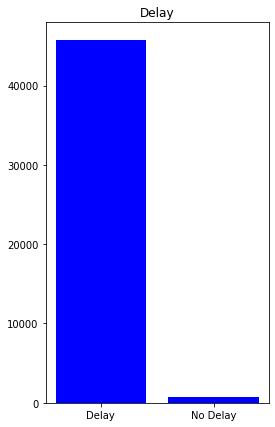

In [27]:
fig = plt.figure(figsize=(4, 7))
plt.bar(['Delay' , 'No Delay'] , data['Delay'].value_counts() , color='blue')
plt.title("Delay")
plt.show()

### Clean up Direction

I will Unified directions. <br> Direction should be categorized and can have 4 valid values: e - for Eastbound, w - for Westbound, s - for Southbound, n - for Northbound. 

In [28]:
valid_directions = ['e','w','s','n']   

In [29]:
data['Direction'].unique() 

array(['E/B', 'W/B', 'S/B', 'N/B', 'EB', 'WB', 'B/W', 's', 'NB', 'wb',
       'eb', 'w/b', 'ew', 'b/w', 'eastbound', 'w', 'sb', 'southbound',
       'northbound', 'Service adjusted.', 'westbound', 'nb', 'b#', 'SB',
       'we', 'EW', 'E', 'Service adjusted', 'W', '14', 's/b', '5', 'Bw',
       '0', 'sw', '2', '506', '54495', '4075', 'bs', 'wruiter adv',
       '(Ref', 'e', '9', 'gap', '1114', 'run', 'ss', '19', '68029',
       'eb``', '6', '512', 'W`', 'n/b', '\\5', '10', '4', '7', '13',
       '-BD#', '30', '`', '510', 'w.b', '\\', '26', 'W\\B', 'N', '20',
       '8', 'e/b', 'ee', '.', 'See also', 'w/B', 'E5'], dtype=object)

In [30]:
print( "Number of All Direction from original data set", data['Direction'].nunique() )

Number of All Direction from original data set 77


In [31]:
data['Direction'] = data['Direction'].str.lower().str.replace('/','')
data['Direction'] = data['Direction'].replace({'eastbound':'e','westbound':'w','southbound':'s','northbound':'n'})
data['Direction'] = data['Direction'].replace('b','',regex=True)

In [32]:
 data = data[data['Direction'].isin(valid_directions)]

In [33]:
print( "Direction after cleanup", data['Direction'].unique() )

Direction after cleanup ['e' 'w' 's' 'n']


In [34]:
data

,Report Date,Route,Time,Day,Incident,Min Gap,Direction,Vehicle,Delay
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,8.0,e,4018.0,1
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,22.0,e,4128.0,1
2,2014-01-02,501,14:01:00,Thursday,Held By,19.0,w,4016.0,1
3,2014-01-02,504,14:22:00,Thursday,Investigation,11.0,w,4175.0,1
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,6.0,e,4080.0,1
...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,Held By,16.0,e,4164.0,1
1694,2017-12-31,501,21:15:00,Sunday,Mechanical,24.0,w,4110.0,1
1695,2017-12-31,501,21:44:00,Sunday,Mechanical,24.0,w,1419.0,1
1696,2017-12-31,510,22:15:00,Sunday,Mechanical,10.0,s,4447.0,1


### Delay by days

In [35]:
Monday = data[data['Day'] == 'Monday']['Delay']
Tuesday = data[data['Day'] == 'Tuesday']['Delay']
Wednesday = data[data['Day'] == 'Wednesday']['Delay']
Thursday = data[data['Day'] == 'Thursday']['Delay']
Friday = data[data['Day'] == 'Friday']['Delay']
Saturday = data[data['Day'] == 'Saturday']['Delay']
Sunday = data[data['Day'] == 'Sunday']['Delay']

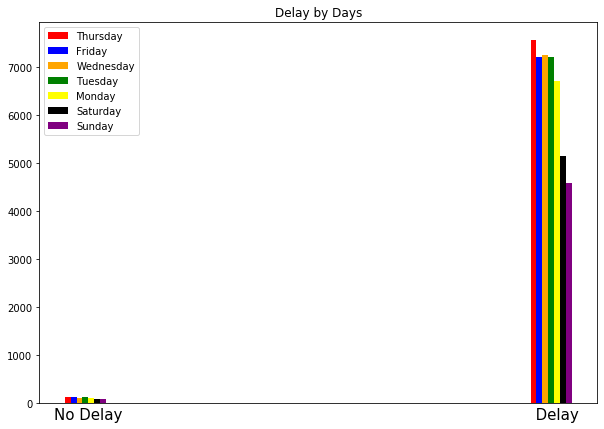

In [36]:
fig = plt.figure(figsize=(10, 7))
  
plt.title("Delay by Days")
plt.xticks([])         
plt.xlabel('No Delay                                                                                       Delay ', fontsize = 15)
plt.hist([Thursday , Friday , Wednesday , Tuesday , Monday , Saturday , Sunday ], color=['red', 'blue', 'orange','green', 'yellow', 'black', 'purple'], label=['Thursday' , 'Friday' , 'Wednesday' , 'Tuesday' , 'Monday' , 'Saturday' , 'Sunday'])
plt.legend(loc='best')
plt.show()

### Delay after Incidents

In [37]:
data['Incident'].unique()

array(['Late Leaving Garage', 'Utilized Off Route', 'Held By',
       'Investigation', 'Mechanical', 'Emergency Services', 'Diversion',
       'General Delay', 'Overhead - Pantograph'], dtype=object)

In [38]:
Late_Leaving_Garage = data[data['Incident'] == 'Late Leaving Garage']['Delay']
Utilized_Off_Route = data[data['Incident'] == 'Utilized Off Route']['Delay']
Held_By = data[data['Incident'] == 'Held By']['Delay']
Investigation = data[data['Incident'] == 'Investigation']['Delay']
Mechanical = data[data['Incident'] == 'Mechanical']['Delay']
Emergency_Services = data[data['Incident'] == 'Emergency Services']['Delay']
Diversion = data[data['Incident'] == 'Diversion']['Delay']
General_Delay = data[data['Incident'] == 'General Delay']['Delay']
Overhead_Pantograph = data[data['Incident'] == 'Overhead - Pantograph']['Delay']

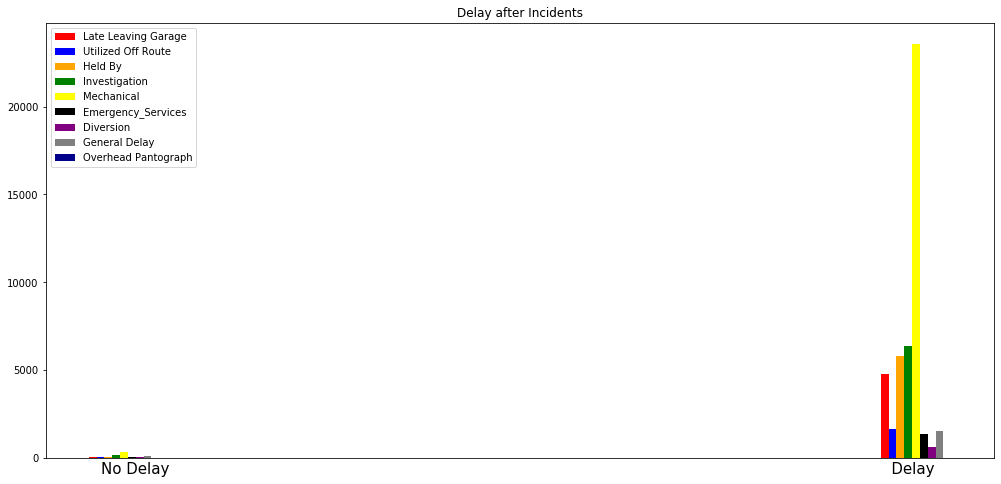

In [39]:
fig = plt.figure(figsize=(17, 8))
  
plt.title("Delay after Incidents")
plt.xticks([])         
plt.xlabel('No Delay                                                                                                                                                        Delay ', fontsize = 15)
plt.hist([Late_Leaving_Garage , Utilized_Off_Route , Held_By , Investigation , Mechanical , Emergency_Services , Diversion, General_Delay, Overhead_Pantograph], color=['red', 'blue', 'orange','green', 'yellow', 'black', 'purple', 'grey', 'darkblue'], label=['Late Leaving Garage' , 'Utilized Off Route' , 'Held By' , 'Investigation' , 'Mechanical' , 'Emergency_Services' , 'Diversion', 'General Delay', 'Overhead Pantograph'])
plt.legend(loc='best')
plt.show()

### Delay by Direction

In [40]:
Eastbound = data[data['Direction'] == 'e']['Delay']
Westbound = data[data['Direction'] == 'w']['Delay']
Southbound = data[data['Direction'] == 's']['Delay']
Northbound = data[data['Direction'] == 'n']['Delay']

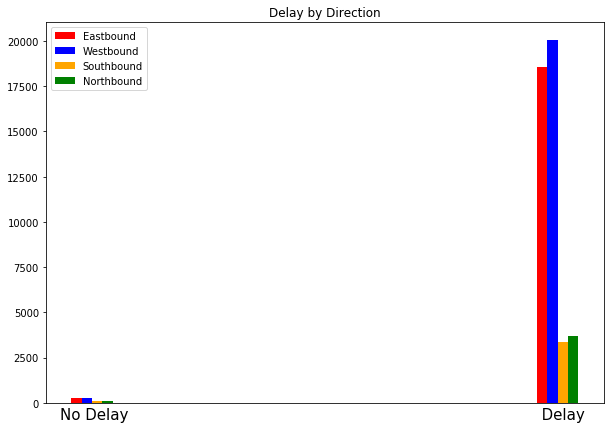

In [41]:
plt.figure(figsize=(10, 7))  
plt.title("Delay by Direction")
plt.xticks([])         
plt.xlabel('No Delay                                                                                       Delay ', fontsize = 15)
plt.hist([Eastbound, Westbound, Southbound, Northbound], color=['red', 'blue', 'orange','green'], label=['Eastbound', 'Westbound', 'Southbound', 'Northbound'])
plt.legend(loc='best')
plt.show()

### Conversion of values in columns Vehicle and Min Gap to int

In [42]:
data = data.astype({ "Vehicle": int, "Min Gap": int })

In [43]:
data.head()

,Report Date,Route,Time,Day,Incident,Min Gap,Direction,Vehicle,Delay
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,8,e,4018,1
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,22,e,4128,1
2,2014-01-02,501,14:01:00,Thursday,Held By,19,w,4016,1
3,2014-01-02,504,14:22:00,Thursday,Investigation,11,w,4175,1
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,6,e,4080,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46364 entries, 0 to 1697
Data columns (total 9 columns):
Report Date    46364 non-null datetime64[ns]
Route          46364 non-null int64
Time           46364 non-null object
Day            46364 non-null object
Incident       46364 non-null object
Min Gap        46364 non-null int32
Direction      46364 non-null object
Vehicle        46364 non-null int32
Delay          46364 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(2), object(4)
memory usage: 3.2+ MB


### Clean up Route

I will remove data with invalid routes that are not in full list of currently used routes by the Toronto streetcar system 

In [45]:
valid_routes = ['501','502','503','504','505','506','509','510','511','512','301','304','306','310']

In [46]:
len(valid_routes)

14

In [47]:
data['Route'].unique()

array([505, 504, 501, 510, 512, 511, 506, 503, 502, 509, 301, 401, 905,
       508,  25,   2,  50, 805, 306, 111,  23,  35,  18,  51,   5,  62,
        57,   4, 405, 500,  68,  20,   8,  63, 201,  65, 210, 204,   9,
        17,  21,  33,  24,  49,  40, 550,  12, 375,   1,   7, 807,   3,
       804,  16,  45,  10, 536,  93, 304,  41,  37,  11, 205, 317,  13,
        22, 535,  14,  83, 514,  81,  15,  55, 999, 519,  43,   6,  56,
        19, 830, 705,  61,  80,  26,  29, 516,  54, 595, 596, 310,  64,
        87, 591], dtype=int64)

In [48]:
data['Route'].nunique()

93

In [49]:
data = data[data['Route'].isin(valid_routes)]

In [50]:
data['Route'].unique()

array([505, 504, 501, 510, 512, 511, 506, 503, 502, 509, 301, 306, 304,
       310], dtype=int64)

In [51]:
data['Route'].nunique()

14

In [52]:
data.shape

(45044, 9)

### One - hot encoding

In machine learning, one-hot encoding is a frequently used method to deal with categorical data. Because many machine learning models need their input variables to be numeric I will transform categorical variables Direction, Incident and Day using one-hot encoding.

In [53]:
data['Direction'].value_counts()

w    19668
e    18319
n     3686
s     3371
Name: Direction, dtype: int64

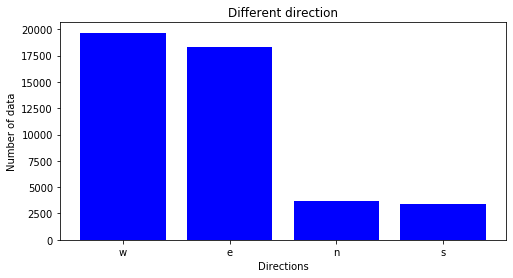

In [54]:
fig = plt.figure(figsize=(8, 4))
plt.bar(data['Direction'].value_counts().index, data['Direction'].value_counts().values, color='blue')
plt.xlabel("Directions")
plt.ylabel("Number of data")
plt.title("Different direction")
plt.show()

In [55]:
data = pd.get_dummies(data, columns=['Direction'])

In [56]:
data['Incident'].value_counts()

Mechanical               23368
Investigation             6324
Held By                   5581
Late Leaving Garage       4699
Utilized Off Route        1593
General Delay             1535
Emergency Services        1310
Diversion                  627
Overhead - Pantograph        7
Name: Incident, dtype: int64

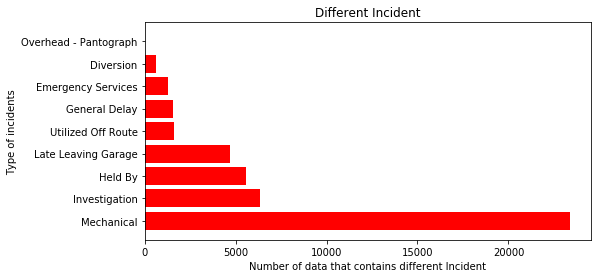

In [57]:
fig = plt.figure(figsize=(8, 4))
plt.barh(data['Incident'].value_counts().index, data['Incident'].value_counts().values, color='red')  
plt.xlabel("Number of data that contains different Incident")
plt.ylabel("Type of incidents")
plt.title("Different Incident")
plt.show()

In [58]:
data = pd.get_dummies(data, columns=['Incident'])

In [59]:
data['Day'].value_counts()

Thursday     7473
Friday       7127
Wednesday    7116
Tuesday      7094
Monday       6624
Saturday     5087
Sunday       4523
Name: Day, dtype: int64

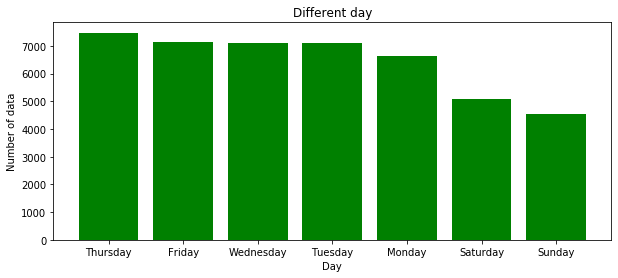

In [60]:
fig = plt.figure(figsize=(10, 4))
plt.bar(data['Day'].value_counts().index, data['Day'].value_counts().values, color='green') 
plt.xlabel("Day")
plt.ylabel("Number of data")
plt.title("Different day")
plt.show()

In [61]:
data = pd.get_dummies(data, columns=['Day'])

In [62]:
data.head()

,Report Date,Route,Time,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,...,Incident_Mechanical,Incident_Overhead - Pantograph,Incident_Utilized Off Route,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2014-01-02,505,06:31:00,8,4018,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014-01-02,504,12:43:00,22,4128,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2014-01-02,501,14:01:00,19,4016,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2014-01-02,504,14:22:00,11,4175,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2014-01-02,504,16:42:00,6,4080,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [63]:
data.shape

(45044, 26)


### Date and Time
Instead of the Report Date column, I will add the Year, Month and Day columns and instead of the Time column I will add the Hour column

In [64]:
data.head()

,Report Date,Route,Time,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,...,Incident_Mechanical,Incident_Overhead - Pantograph,Incident_Utilized Off Route,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2014-01-02,505,06:31:00,8,4018,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014-01-02,504,12:43:00,22,4128,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2014-01-02,501,14:01:00,19,4016,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2014-01-02,504,14:22:00,11,4175,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2014-01-02,504,16:42:00,6,4080,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [65]:
# Creating the year column from column Report Date.
data['Year'] = data['Report Date'].dt.year

# Creating the month column from column Report Date.
data['Month'] = data['Report Date'].dt.month

# Creating the day column from column Report Date.
data['Day'] = data['Report Date'].dt.day

# Creating the hour column from column Time.
data[['Hour']] = pd.DataFrame([(x.hour) for x in data['Time']])

In [66]:
data.head()

,Report Date,Route,Time,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
0,2014-01-02,505,06:31:00,8,4018,1,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,6
1,2014-01-02,504,12:43:00,22,4128,1,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,12
2,2014-01-02,501,14:01:00,19,4016,1,0,0,0,1,...,0,0,0,1,0,0,2014,1,2,14
3,2014-01-02,504,14:22:00,11,4175,1,0,0,0,1,...,0,0,0,1,0,0,2014,1,2,14
4,2014-01-02,504,16:42:00,6,4080,1,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,16


In [67]:
data.shape

(45044, 30)

In [68]:
data = data.drop(columns=['Report Date' , 'Time'])

In [69]:
data.head()

,Route,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
0,505,8,4018,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,6
1,504,22,4128,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,12
2,501,19,4016,1,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
3,504,11,4175,1,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
4,504,6,4080,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,16


In [70]:
data.shape

(45044, 28)

### Delay throug the year

In [71]:
Year_2014 = data[data['Year'] == 2014]['Delay']
Year_2015 = data[data['Year'] == 2015]['Delay']
Year_2016 = data[data['Year'] == 2016]['Delay']
Year_2017 = data[data['Year'] == 2017]['Delay']

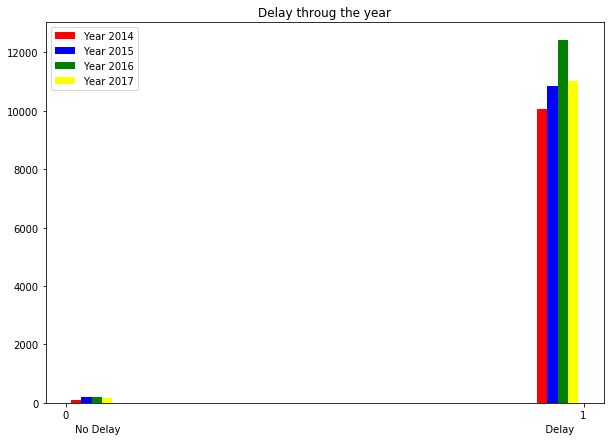

In [72]:
fig = plt.figure(figsize=(10, 7))  
plt.title("Delay throug the year")
plt.xticks([0 , 1])         
plt.xlabel('No Delay                                                                                                                                        Delay')
plt.hist([Year_2014 , Year_2015 , Year_2016 , Year_2017], color=['red', 'blue', 'green', 'yellow'], label=['Year 2014' , 'Year 2015' , 'Year 2016' , 'Year 2017'])
plt.legend(loc='best')
plt.show()

In [73]:
feature_names = data.columns
# for col in feature_names:
#     print(col)

In [74]:
corrcoefs = data.corr()['Delay']
corrcoefs

Route                            -0.008716
Min Gap                           0.056566
Vehicle                           0.001145
Delay                             1.000000
Direction_e                       0.011842
Direction_n                      -0.023678
Direction_s                      -0.020946
Direction_w                       0.012471
Incident_Diversion               -0.023048
Incident_Emergency Services       0.001560
Incident_General Delay           -0.060980
Incident_Held By                  0.030531
Incident_Investigation           -0.014389
Incident_Late Leaving Garage      0.017236
Incident_Mechanical               0.014905
Incident_Overhead - Pantograph    0.001530
Incident_Utilized Off Route      -0.023245
Day_Friday                       -0.008207
Day_Monday                        0.005826
Day_Saturday                      0.000255
Day_Sunday                       -0.000565
Day_Thursday                     -0.005024
Day_Tuesday                      -0.000402
Day_Wednesd

In [75]:
# corrcoefs_for_barh = ( (corrcoefs.drop('Delay')) * 1000000 ).astype(int)
corrcoefs_for_barh = corrcoefs.drop('Delay')
corrcoefs_for_barh


Route                            -0.008716
Min Gap                           0.056566
Vehicle                           0.001145
Direction_e                       0.011842
Direction_n                      -0.023678
Direction_s                      -0.020946
Direction_w                       0.012471
Incident_Diversion               -0.023048
Incident_Emergency Services       0.001560
Incident_General Delay           -0.060980
Incident_Held By                  0.030531
Incident_Investigation           -0.014389
Incident_Late Leaving Garage      0.017236
Incident_Mechanical               0.014905
Incident_Overhead - Pantograph    0.001530
Incident_Utilized Off Route      -0.023245
Day_Friday                       -0.008207
Day_Monday                        0.005826
Day_Saturday                      0.000255
Day_Sunday                       -0.000565
Day_Thursday                     -0.005024
Day_Tuesday                      -0.000402
Day_Wednesday                     0.008324
Year       

IndexError: arrays used as indices must be of integer (or boolean) type

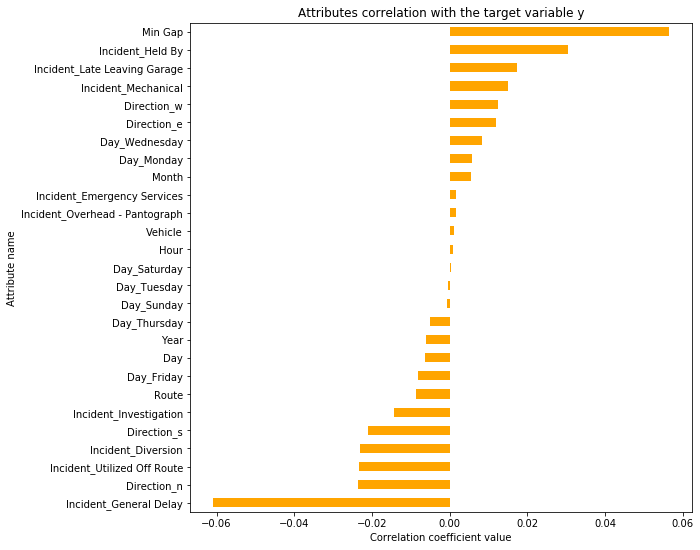

In [76]:
number_of_features = len(data.columns)

coefs_for_plot = pd.Series(corrcoefs_for_barh).sort_values()
coefs_for_plot.plot(kind = "barh", color = 'orange', figsize = (9, 9))

plt.title("Attributes correlation with the target variable y" )
plt.ylabel('Attribute name')
plt.xlabel('Correlation coefficient value')
plt.yticks(np.arange(number_of_features), list(feature_names[coefs_for_plot.index]))
plt.plot()

In [77]:
y = data['Delay']
X = data.drop(columns=['Delay'])

In [78]:
X.corr()

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
Route,1.000000,-0.086860,0.003536,-0.019117,0.064304,0.058385,-0.047580,-0.023700,-0.055631,0.017453,...,0.010611,-0.029604,-0.049578,0.015163,0.009791,0.024823,-0.011980,-0.001899,0.011446,-0.000178
Min Gap,-0.086860,1.000000,-0.020061,-0.018443,-0.031929,-0.017381,0.045133,0.175230,0.048142,0.010307,...,-0.013045,0.015613,0.042096,-0.015156,-0.005897,-0.009730,-0.015375,0.016159,-0.001196,-0.005060
Vehicle,0.003536,-0.020061,1.000000,0.015028,-0.001610,0.000429,-0.014221,-0.002160,0.001392,-0.024807,...,-0.002274,-0.004080,-0.003524,-0.002267,0.008051,0.001761,-0.049402,0.001179,-0.001149,0.000911
Direction_e,-0.019117,-0.018443,0.015028,1.000000,-0.247167,-0.235475,-0.728888,-0.018901,-0.012847,-0.022736,...,-0.004201,-0.007830,-0.005333,0.004471,0.012275,0.000122,-0.008377,-0.030390,-0.010049,0.003917
Direction_n,0.064304,-0.031929,-0.001610,-0.247167,1.000000,-0.084908,-0.262825,-0.001596,-0.012627,-0.015004,...,-0.004585,0.009142,0.001315,0.000321,-0.004783,0.003262,-0.003167,-0.001273,-0.010484,-0.002060
Direction_s,0.058385,-0.017381,0.000429,-0.235475,-0.084908,1.000000,-0.250392,-0.002825,-0.005542,-0.020404,...,0.006021,0.005678,0.006880,-0.007091,-0.009010,-0.002902,-0.005430,0.008200,0.000749,0.002629
Direction_w,-0.047580,0.045133,-0.014221,-0.728888,-0.262825,-0.250392,1.000000,0.021100,0.022643,0.041636,...,0.003501,-0.000309,0.000905,-0.000843,-0.004734,-0.000384,0.012928,0.026452,0.015350,-0.004136
Incident_Diversion,-0.023700,0.175230,-0.002160,-0.018901,-0.001596,-0.002825,0.021100,1.000000,-0.020563,-0.022316,...,-0.005460,0.002509,0.026506,-0.002049,-0.000388,-0.006262,0.009340,0.011782,-0.000767,0.001514
Incident_Emergency Services,-0.055631,0.048142,0.001392,-0.012847,-0.012627,-0.005542,0.022643,-0.020563,1.000000,-0.032508,...,-0.008074,0.017137,0.026137,-0.005801,-0.007367,-0.006865,0.018482,-0.000305,-0.007546,-0.008458
Incident_General Delay,0.017453,0.010307,-0.024807,-0.022736,-0.015004,-0.020404,0.041636,-0.022316,-0.032508,1.000000,...,-0.020637,0.010302,0.018267,0.003729,-0.014024,-0.001173,0.038061,0.021885,0.013049,-0.000141


In [79]:
number_of_features = X.shape[1]

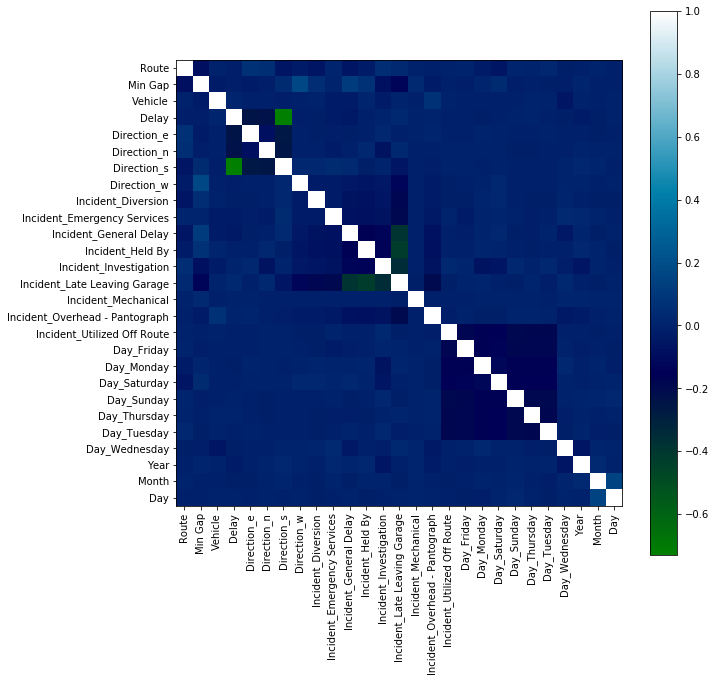

In [80]:
plt.figure(figsize = (10, 10))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(X.corr(), cmap='ocean')
plt.colorbar()
plt.show()

# Logistic regression

In [81]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [82]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [83]:
X_train.shape

(30179, 27)

In [84]:
X_test.shape

(14865, 27)

In [85]:
 y_train.shape
    

(30179,)

In [86]:
y_test.shape

(14865,)

In [87]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
wd_train = np.sum(y_train == 0)
d_train = np.sum(y_train == 1)
print('Train Delay: ', d_train, '     Train Without Delay: ', wd_train)

Train Delay:  29731      Train Without Delay:  448


In [89]:
wd_test = np.sum(y_test == 0)
d_test = np.sum(y_test == 1)
print('Test Delay: ', d_test, '     Test Without Delay: ', wd_test)

Test Delay:  14645      Test Without Delay:  220


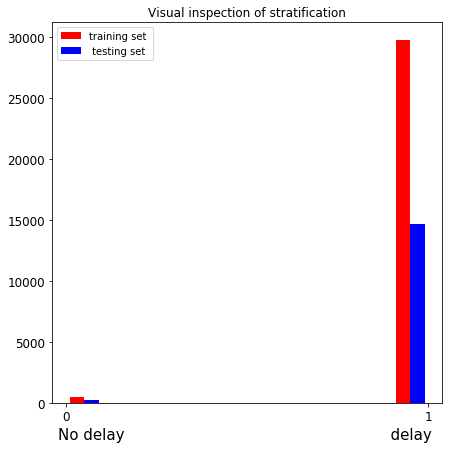

In [90]:
plt.figure(figsize = (7, 7))
matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12) 
plt.title("Visual inspection of stratification")
plt.xticks([0,1])
plt.xlabel('No delay                                                        delay ', fontsize = 15 )
plt.hist([y_train, y_test], color=['red', 'blue'], label=['training set ',' testing set'])
plt.legend(loc='best')
plt.show()

## Model learning

In [91]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [92]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
model.intercept_

array([8.5299948])

In [94]:
model.coef_

array([[ 4.90790829e-02,  1.25658767e+01,  6.03311894e-02,
        -2.18276782e-03,  4.70885003e-02, -3.05541783e-02,
        -7.86958723e-03, -5.82339156e-02, -2.60995201e-02,
        -2.68324722e-01,  1.66379250e-01, -1.86619328e-01,
         2.52870554e-01,  3.64399362e-02,  3.34655481e-02,
        -1.40924837e-01, -4.81297162e-02,  4.74150376e-02,
        -3.25820731e-02, -3.67521391e-02, -4.32427030e-02,
         5.60851700e-02,  4.84709167e-02, -1.02366586e-01,
         3.55862687e-02, -5.56892492e-02, -3.04213311e-02]])

## Evaluation

In [95]:
y_test_predicted = model.predict(X_test)

In [96]:
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
accuracy

0.986343760511268

In [97]:
precision = metrics.precision_score(y_test, y_test_predicted)
precision

0.9868527508090615

In [98]:
recall = metrics.recall_score(y_test, y_test_predicted)
recall

0.999453738477296

In [99]:
f1 = metrics.f1_score(y_test, y_test_predicted)
f1

0.99311327475659

In [100]:
y_train_predicted = model.predict(X_train)

In [101]:
y_train_predicted[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [102]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [103]:
print("Accuracy at the training set: {train}\nAccuracy at the test set: {test}".format(train=train_score, test=test_score))

Accuracy at the training set: 0.9867126147320985
Accuracy at the test set: 0.986343760511268


In [104]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.76      0.11      0.20       220
           1       0.99      1.00      0.99     14645

    accuracy                           0.99     14865
   macro avg       0.87      0.56      0.60     14865
weighted avg       0.98      0.99      0.98     14865



In [105]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[   25,   195],
       [    8, 14637]], dtype=int64)

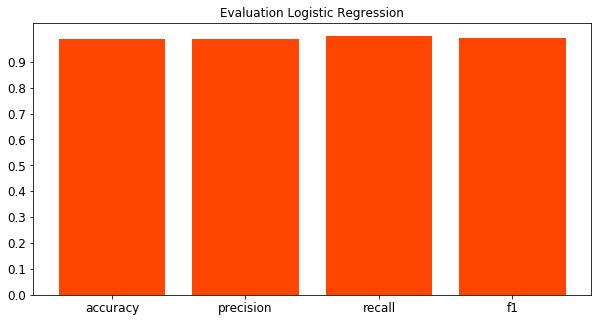

In [106]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['accuracy', 'precision', 'recall', 'f1'], [accuracy , precision, recall, f1], color='orangered')
plt.title("Evaluation Logistic Regression")
plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

# Neural networks

In [107]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.layers import Dropout
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from keras import optimizers
from keras import losses

In [108]:
np.random.seed(7)

## Creating Neural networks

I will create a neural network with advance propagation. <br> The neural network will have an input layer, three hidden layers with, respectively, 100, 40 and 20 neurons, and an output layer. <br> The number of input layer neurons corresponds to the number of attributes of the data set, which is 27. <br> The number of output layer neurons is 1 since it is a binary classification. <br> In hidden layers I will use relu activation function and in the latter sigmoid function. <br> Optimizer Adam will be used. <br> Binary cross entropy as a function of error will be used. <br> Since the task of classification metrics will be accuracy. <br> I will use Dropout regularization for reducing overfitting and improving the generalization. 

In [109]:
number_of_features = X_train.shape[1]
output_size = 1

In [110]:
number_of_features

27

In [111]:
model = Sequential()
model.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))
model.add(Dense(units = 40, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = output_size, activation = 'sigmoid'))

In [112]:
model.compile( optimizers.Adam(learning_rate = 0.0001), loss = losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [114]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/50
755/755 [==============================] - 5s 7ms/step - loss: 0.1812 - accuracy: 0.9798 - val_loss: 0.0796 - val_accuracy: 0.9853
Epoch 2/50
755/755 [==============================] - 4s 5ms/step - loss: 0.0811 - accuracy: 0.9851 - val_loss: 0.0745 - val_accuracy: 0.9853
Epoch 3/50
755/755 [==============================] - 4s 5ms/step - loss: 0.0764 - accuracy: 0.9851 - val_loss: 0.0720 - val_accuracy: 0.9853
Epoch 4/50
755/755 [==============================] - 4s 6ms/step - loss: 0.0730 - accuracy: 0.9851 - val_loss: 0.0699 - val_accuracy: 0.9853
Epoch 5/50
755/755 [==============================] - 4s 6ms/step - loss: 0.0714 - accuracy: 0.9851 - val_loss: 0.0683 - val_accuracy: 0.9853
Epoch 6/50
755/755 [==============================] - 4s 5ms/step - loss: 0.0692 - accuracy: 0.9851 - val_loss: 0.0666 - val_accuracy: 0.9853
Epoch 7/50
755/755 [==============================] - 5s 7ms/step - loss: 0.0673 - accuracy: 0.9851 - val_loss: 0.0648 - val_accuracy: 0.9853
Epoch 

In [115]:
epochs = history.epoch

loss = history.history['loss']
validation_loss = history.history['val_loss']

acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

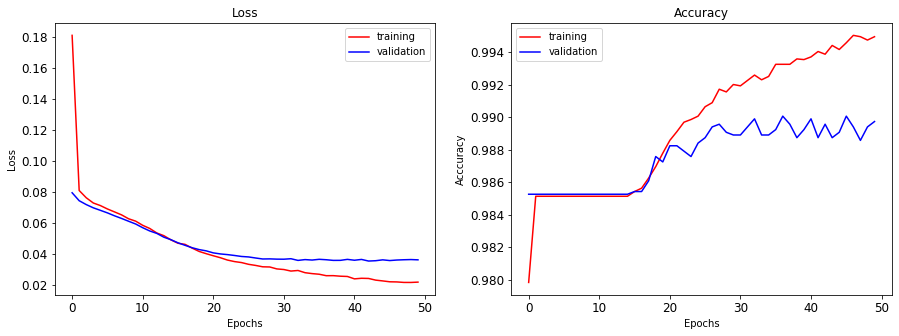

In [116]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

## Neural network evaluation

In [117]:
final_model = Sequential()
final_model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model.add(Dense(units=40, activation='relu'))
final_model.add(Dense(units=20, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(units=output_size, activation='sigmoid'))
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [118]:
history = final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 1)

Epoch 1/50
944/944 [==============================] - 4s 4ms/step - loss: 0.1632 - accuracy: 0.9808
Epoch 2/50
944/944 [==============================] - 4s 4ms/step - loss: 0.0803 - accuracy: 0.9852
Epoch 3/50
944/944 [==============================] - 5s 5ms/step - loss: 0.0751 - accuracy: 0.9852
Epoch 4/50
944/944 [==============================] - 4s 4ms/step - loss: 0.0712 - accuracy: 0.9852
Epoch 5/50
944/944 [==============================] - 4s 4ms/step - loss: 0.0682 - accuracy: 0.9852
Epoch 6/50
944/944 [==============================] - 4s 4ms/step - loss: 0.0662 - accuracy: 0.9852
Epoch 7/50
944/944 [==============================] - 4s 5ms/step - loss: 0.0634 - accuracy: 0.9852
Epoch 8/50
944/944 [==============================] - 4s 4ms/step - loss: 0.0606 - accuracy: 0.9852
Epoch 9/50
944/944 [==============================] - 4s 4ms/step - loss: 0.0584 - accuracy: 0.9852
Epoch 10/50
944/944 [==============================] - 4s 4ms/step - loss: 0.0554 - accuracy: 0.9852

In [119]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

465/465 [==============================] - 2s 4ms/step - loss: 0.0364 - accuracy: 0.9873
Test loss: 0.036356858909130096, test accuracy: 0.9872855544090271


In [120]:
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

944/944 [==============================] - 4s 4ms/step - loss: 0.0167 - accuracy: 0.9970
Train loss: 0.016659606248140335, train accuracy: 0.9969515204429626


In [121]:
epochs = history.epoch
loss = history.history['loss']
acc = history.history['accuracy']

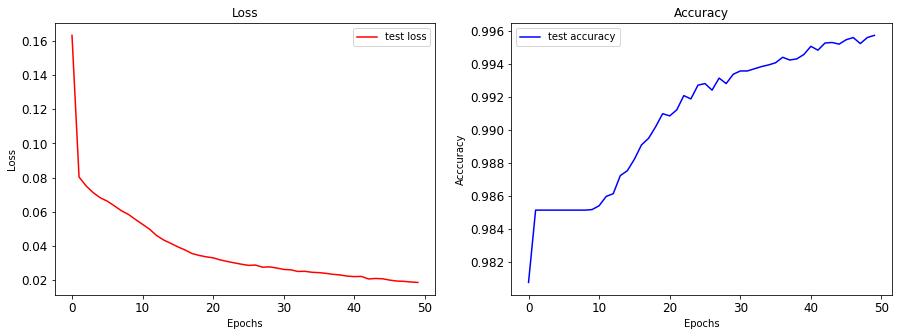

In [122]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='test loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='blue', label = 'test accuracy')
plt.legend(loc='best')

## Save model

In [123]:
from keras.models import load_model

In [124]:
model.save('final_model_without_oversampling.h5') 

### Oversampling 
Since the data is not balanced I will do Oversampling

In [125]:
oversampling_set = data[data['Delay'] == 0.0]

In [126]:
data_balanced  = data

In [127]:
for x in range(50):
    oversampling_set  = shuffle(oversampling_set)
    data_balanced = data_balanced.append(oversampling_set)
    data_balanced  = shuffle(data_balanced )

In [128]:
data_balanced  = shuffle(data_balanced )

In [129]:
print("Without delay ", data_balanced[data_balanced['Delay']==0].shape[0])
print("With delay ", data_balanced[data_balanced['Delay']==1].shape[0])

Without delay  34068
With delay  44376


In [130]:
data_balanced['Delay'].value_counts()

1    44376
0    34068
Name: Delay, dtype: int64

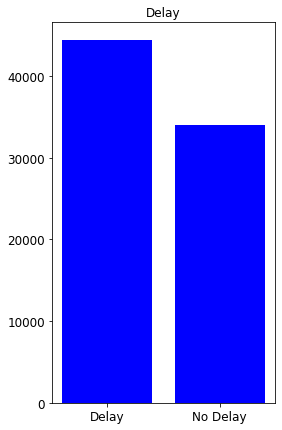

In [131]:
plt.figure(figsize=(4, 7))
plt.bar(['Delay', 'No Delay'], data_balanced['Delay'].value_counts().values, color='blue')
plt.title("Delay")
plt.show()

In [132]:
data_balanced

,Route,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
1140,511,0,4190,1,0,1,0,0,0,0,...,0,0,0,0,1,0,2014,9,30,6
398,504,8,4049,1,1,0,0,0,0,0,...,0,0,0,0,0,0,2015,6,12,8
6,504,0,4077,0,0,1,0,0,0,0,...,0,0,0,0,0,1,2017,2,1,18
332,506,0,4028,0,0,0,1,0,0,0,...,0,0,0,0,1,0,2014,9,9,9
978,501,11,1601,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2017,1,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,510,12,4124,1,0,1,0,0,0,0,...,0,1,0,0,0,0,2016,1,2,8
478,505,14,4045,1,1,0,0,0,0,0,...,0,0,0,0,0,1,2016,1,13,5
512,505,0,4074,0,0,0,0,1,0,0,...,0,0,0,0,1,0,2015,8,18,14
698,504,18,4023,1,0,0,0,1,0,0,...,0,0,1,0,0,0,2017,10,22,22


In [133]:
data_balanced.describe() 

,Route,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
count,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,...,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000
mean,502.700487,11.364986,4299.540908,0.565703,0.386505,0.104355,0.093965,0.415175,0.023291,0.028173,...,0.139896,0.112654,0.101002,0.172390,0.157998,0.147443,2015.573556,6.374254,15.879621,10.750433
std,26.667264,29.411028,1433.941371,0.495667,0.486952,0.305722,0.291782,0.492755,0.150826,0.165468,...,0.346881,0.316171,0.301333,0.377722,0.364742,0.354549,1.059206,3.400198,8.883369,5.436824
min,301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,504.000000,0.000000,4076.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,6.000000
50%,505.000000,8.000000,4152.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,6.000000,16.000000,10.000000
75%,510.000000,14.000000,4227.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,9.000000,24.000000,15.000000
max,512.000000,4216.000000,163242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,31.000000,23.000000


In [134]:
feature_names = data_balanced.columns
# for col in feature_names:
#     print(col)

In [135]:
corrcoefs = data_balanced.corr()['Delay']
corrcoefs

Route                            -0.034926
Min Gap                           0.278729
Vehicle                           0.004735
Delay                             1.000000
Direction_e                       0.048985
Direction_n                      -0.087057
Direction_s                      -0.077461
Direction_w                       0.051473
Incident_Diversion               -0.073416
Incident_Emergency Services       0.006497
Incident_General Delay           -0.174988
Incident_Held By                  0.144867
Incident_Investigation           -0.056236
Incident_Late Leaving Garage      0.077048
Incident_Mechanical               0.061083
Incident_Overhead - Pantograph    0.008277
Incident_Utilized Off Route      -0.080581
Day_Friday                       -0.032804
Day_Monday                        0.024392
Day_Saturday                      0.001048
Day_Sunday                       -0.002310
Day_Thursday                     -0.020291
Day_Tuesday                      -0.001645
Day_Wednesd

In [136]:
# corrcoefs_for_barh = ( (corrcoefs.drop('Delay')) * 1000000 ).astype(int)
corrcoefs_for_barh = corrcoefs.drop('Delay')
corrcoefs_for_barh


Route                            -0.034926
Min Gap                           0.278729
Vehicle                           0.004735
Direction_e                       0.048985
Direction_n                      -0.087057
Direction_s                      -0.077461
Direction_w                       0.051473
Incident_Diversion               -0.073416
Incident_Emergency Services       0.006497
Incident_General Delay           -0.174988
Incident_Held By                  0.144867
Incident_Investigation           -0.056236
Incident_Late Leaving Garage      0.077048
Incident_Mechanical               0.061083
Incident_Overhead - Pantograph    0.008277
Incident_Utilized Off Route      -0.080581
Day_Friday                       -0.032804
Day_Monday                        0.024392
Day_Saturday                      0.001048
Day_Sunday                       -0.002310
Day_Thursday                     -0.020291
Day_Tuesday                      -0.001645
Day_Wednesday                     0.035115
Year       

IndexError: arrays used as indices must be of integer (or boolean) type

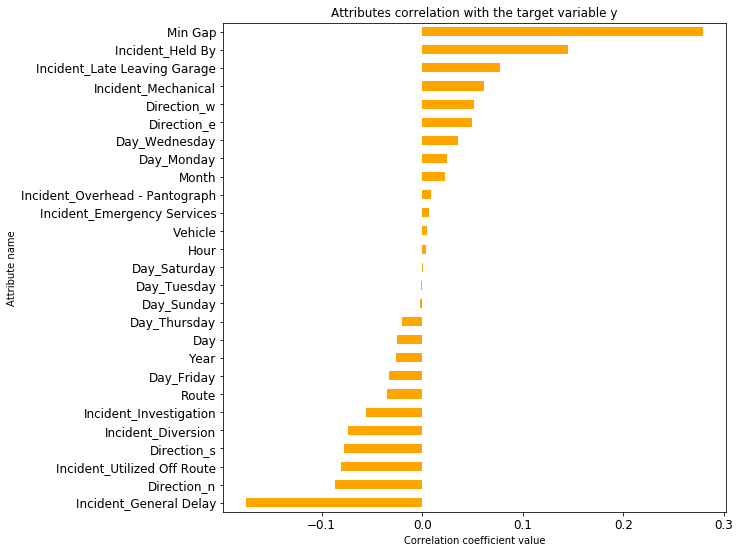

In [137]:
number_of_features = len(data_balanced.columns)

coefs_for_plot = pd.Series(corrcoefs_for_barh).sort_values()
coefs_for_plot.plot(kind = "barh", color = 'orange', figsize = (9, 9))

plt.title("Attributes correlation with the target variable y" )
plt.ylabel('Attribute name')
plt.xlabel('Correlation coefficient value')
plt.yticks(np.arange(number_of_features), list(feature_names[coefs_for_plot.index]))
plt.plot()

In [138]:
y = data_balanced['Delay']
X = data_balanced.drop(columns=['Delay'])

In [139]:
X.corr()

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
Route,1.000000,-0.090835,-0.000206,-0.007527,0.056262,0.065490,-0.066248,-0.068125,-0.115807,0.066561,...,0.025761,-0.076482,-0.057406,0.022075,-0.004348,0.038360,-0.015195,-0.024061,-0.011307,-0.001935
Min Gap,-0.090835,1.000000,-0.012631,-0.012296,-0.051257,-0.036179,0.065376,0.088779,0.088769,-0.056070,...,0.000389,0.008964,0.024205,-0.025578,0.016828,-0.002881,-0.009246,0.013451,-0.018059,-0.006272
Vehicle,-0.000206,-0.012631,1.000000,0.029031,0.025599,-0.014690,-0.035873,-0.020570,0.012695,-0.044952,...,0.008296,0.021635,0.024436,-0.040605,-0.002598,-0.002825,-0.108997,0.031157,-0.001586,0.013271
Direction_e,-0.007527,-0.012296,0.029031,1.000000,-0.270932,-0.255613,-0.668767,-0.017383,-0.018855,0.150019,...,0.020339,-0.020828,-0.035471,-0.006980,0.028255,0.020282,-0.043491,-0.033423,-0.016545,-0.024280
Direction_n,0.056262,-0.051257,0.025599,-0.270932,1.000000,-0.109926,-0.287601,-0.025340,-0.025106,-0.072576,...,-0.014808,-0.009256,-0.007168,-0.043958,0.018935,0.016469,0.031135,-0.037375,-0.034034,0.029090
Direction_s,0.065490,-0.036179,-0.014690,-0.255613,-0.109926,1.000000,-0.271340,-0.008306,0.020948,-0.069629,...,-0.007579,0.009898,0.009934,-0.016505,-0.002708,0.022575,0.043613,0.032938,0.010645,0.029907
Direction_w,-0.066248,0.065376,-0.035873,-0.668767,-0.287601,-0.271340,1.000000,0.037818,0.021805,-0.061993,...,-0.006424,0.020465,0.033618,0.043944,-0.038067,-0.043629,-0.002163,0.036714,0.031163,-0.011764
Incident_Diversion,-0.068125,0.088779,-0.020570,-0.017383,-0.025340,-0.008306,0.037818,1.000000,-0.026292,-0.043165,...,-0.005748,0.045228,0.047816,-0.036912,-0.032596,0.004201,0.024028,0.008930,-0.021989,0.003933
Incident_Emergency Services,-0.115807,0.088769,0.012695,-0.018855,-0.025106,0.020948,0.021805,-0.026292,1.000000,-0.047593,...,0.002627,0.058491,-0.008236,-0.006116,0.007778,-0.029954,0.000469,0.033781,0.020867,0.014830
Incident_General Delay,0.066561,-0.056070,-0.044952,0.150019,-0.072576,-0.069629,-0.061993,-0.043165,-0.047593,1.000000,...,-0.011242,-0.052943,0.004047,0.024207,-0.006500,0.013977,-0.077786,-0.015583,0.014625,-0.039306


In [140]:
number_of_features = X.shape[1]

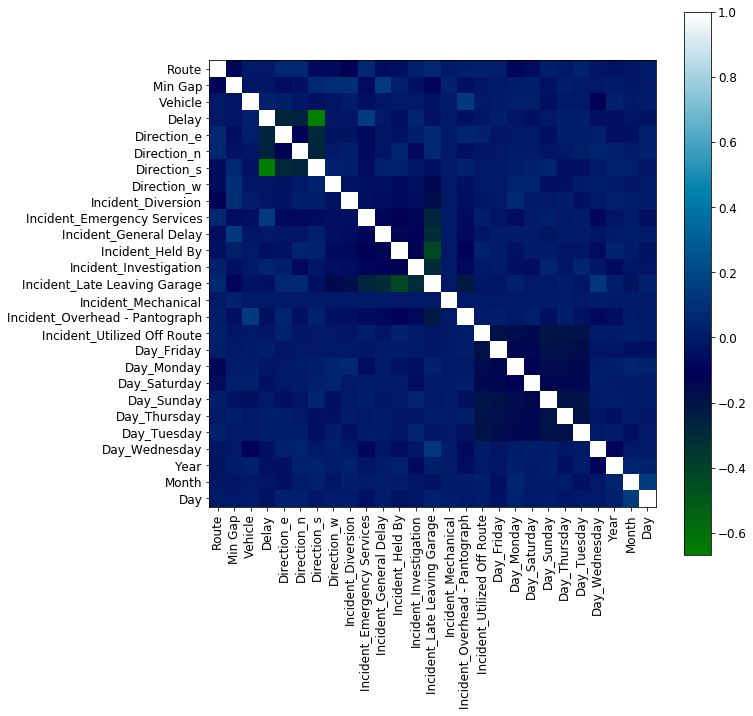

In [141]:
plt.figure(figsize = (10, 10))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(X.corr(), cmap='ocean')
plt.colorbar()
plt.show()

# Logistic regression

In [142]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [143]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [144]:
X_train.shape

(52557, 27)

In [145]:
X_test.shape

(25887, 27)

In [146]:
 y_train.shape
    

(52557,)

In [147]:
y_test.shape

(25887,)

In [148]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
wd_train = np.sum(y_train == 0)
d_train = np.sum(y_train == 1)
print('Train Delay: ', d_train, '     Train Without Delay: ', wd_train)

Train Delay:  29732      Train Without Delay:  22825


In [150]:
wd_test = np.sum(y_test == 0)
d_test = np.sum(y_test == 1)
print('Test Delay: ', d_test, '     Test Without Delay: ', wd_test)

Test Delay:  14644      Test Without Delay:  11243


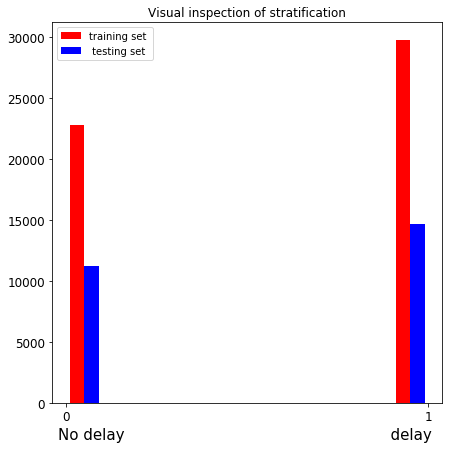

In [151]:
plt.figure(figsize = (7, 7))
matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12) 
plt.title("Visual inspection of stratification")
plt.xticks([0,1])
plt.xlabel('No delay                                                        delay ', fontsize = 15 )
plt.hist([y_train, y_test], color=['red', 'blue'], label=['training set ',' testing set'])
plt.legend(loc='best')
plt.show()

## Model learning

In [152]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [153]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
model.intercept_

array([1.4270589])

In [155]:
model.coef_

array([[ 2.44740938e-01,  8.15960031e+00, -6.38730536e-03,
         7.67678217e-02, -6.96427118e-02, -4.09649060e-02,
        -8.26101754e-03, -2.43019356e-01, -2.21664151e-01,
        -2.41417202e-01,  7.44242648e-02, -1.05001040e-01,
         2.32997961e-01,  1.77756597e-01,  7.41219202e-02,
        -7.05116802e-03, -9.06699464e-03,  3.41975469e-02,
        -3.87929716e-02, -5.28210258e-02,  1.45075522e-02,
        -1.31644725e-02,  5.35833103e-02, -1.22083375e-01,
         3.56497175e-02, -1.76945274e-02,  8.85600129e-03]])

## Evaluation

In [156]:
y_test_predicted = model.predict(X_test)

In [157]:
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
accuracy

0.9361069262564221

In [158]:
precision = metrics.precision_score(y_test, y_test_predicted)
precision

0.9390293362173854

In [159]:
recall = metrics.recall_score(y_test, y_test_predicted)
recall

0.9486479104069926

In [160]:
f1 = metrics.f1_score(y_test, y_test_predicted)
f1

0.9438141178069163

In [161]:
y_train_predicted = model.predict(X_train)

In [162]:
y_train_predicted[:30]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [163]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [164]:
print("Accuracy at the training set: {train}\nAccuracy at the test set: {test}".format(train=train_score, test=test_score))

Accuracy at the training set: 0.9337290941263771
Accuracy at the test set: 0.9361069262564221


In [165]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11243
           1       0.94      0.95      0.94     14644

    accuracy                           0.94     25887
   macro avg       0.94      0.93      0.93     25887
weighted avg       0.94      0.94      0.94     25887



In [166]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[10341,   902],
       [  752, 13892]], dtype=int64)

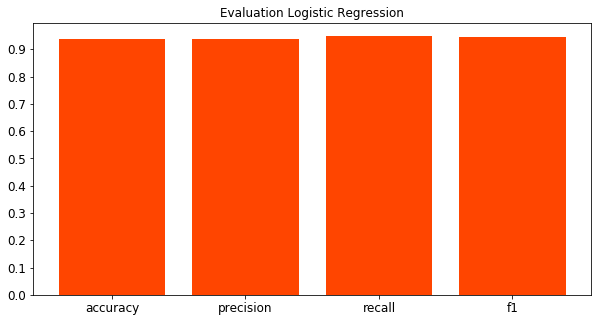

In [167]:
fig = plt.figure(figsize=(10, 5))
plt.bar(['accuracy', 'precision', 'recall', 'f1'], [accuracy , precision, recall, f1], color='orangered')
plt.title("Evaluation Logistic Regression")
plt.yticks(np.arange(0, 1, 0.1)) 
plt.show()

# Neural networks

In [168]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.layers import Dropout
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from keras import optimizers
from keras import losses

In [169]:
np.random.seed(7)

## Creating Neural networks

I will create a neural network with advance propagation. <br> The neural network will have an input layer, three hidden layers with, respectively, 100, 40 and 20 neurons, and an output layer. <br> The number of input layer neurons corresponds to the number of attributes of the data set, which is 27. <br> The number of output layer neurons is 1 since it is a binary classification. <br> In hidden layers I will use relu activation function and in the latter sigmoid function. <br> Optimizer Adam will be used. <br> Binary cross entropy as a function of error will be used. <br> Since the task of classification metrics will be accuracy. <br> I will use Dropout regularization for reducing overfitting and improving the generalization. 

In [170]:
number_of_features = X_train.shape[1]
output_size = 1

In [171]:
number_of_features

27

In [172]:
model = Sequential()
model.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))
model.add(Dense(units = 40, activation = 'relu'))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = output_size, activation = 'sigmoid'))

In [173]:
model.compile( optimizers.Adam(learning_rate = 0.0001), loss = losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [174]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               2800      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                820       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [175]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/50
1314/1314 [==============================] - 8s 6ms/step - loss: 0.5754 - accuracy: 0.7064 - val_loss: 0.4567 - val_accuracy: 0.8163
Epoch 2/50
1314/1314 [==============================] - 9s 7ms/step - loss: 0.3513 - accuracy: 0.8848 - val_loss: 0.2652 - val_accuracy: 0.9241
Epoch 3/50
1314/1314 [==============================] - 8s 6ms/step - loss: 0.2296 - accuracy: 0.9357 - val_loss: 0.1925 - val_accuracy: 0.9424
Epoch 4/50
1314/1314 [==============================] - 8s 6ms/step - loss: 0.1763 - accuracy: 0.9467 - val_loss: 0.1577 - val_accuracy: 0.9505
Epoch 5/50
1314/1314 [==============================] - 8s 6ms/step - loss: 0.1510 - accuracy: 0.9528 - val_loss: 0.1405 - val_accuracy: 0.9553
Epoch 6/50
1314/1314 [==============================] - 7s 5ms/step - loss: 0.1354 - accuracy: 0.9569 - val_loss: 0.1288 - val_accuracy: 0.9599
Epoch 7/50
1314/1314 [==============================] - 9s 7ms/step - loss: 0.1232 - accuracy: 0.9603 - val_loss: 0.1191 - val_accuracy:

In [176]:
epochs = history.epoch

loss = history.history['loss']
validation_loss = history.history['val_loss']

acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

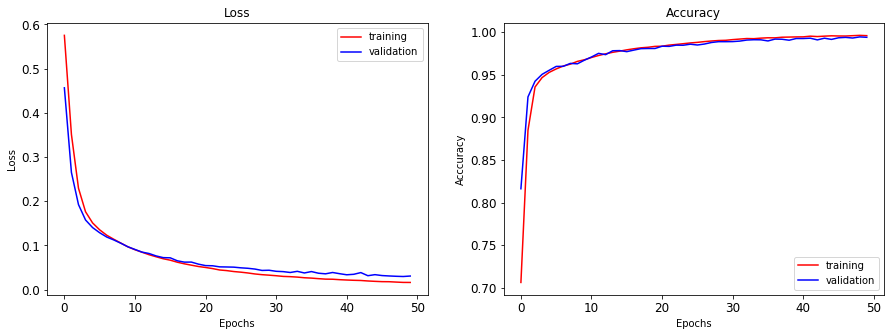

In [177]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

## Neural network evaluation

In [178]:
final_model = Sequential()
final_model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model.add(Dense(units=40, activation='relu'))
final_model.add(Dense(units=20, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(units=output_size, activation='sigmoid'))
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [179]:
history = final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 1)

Epoch 1/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.5785 - accuracy: 0.6946: 0s - loss: 0.584
Epoch 2/50
1643/1643 [==============================] - 9s 6ms/step - loss: 0.3423 - accuracy: 0.8926
Epoch 3/50
1643/1643 [==============================] - 9s 6ms/step - loss: 0.2222 - accuracy: 0.9376
Epoch 4/50
1643/1643 [==============================] - 9s 5ms/step - loss: 0.1745 - accuracy: 0.9483
Epoch 5/50
1643/1643 [==============================] - 9s 6ms/step - loss: 0.1468 - accuracy: 0.9539
Epoch 6/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.1281 - accuracy: 0.9589
Epoch 7/50
1643/1643 [==============================] - 11s 7ms/step - loss: 0.1141 - accuracy: 0.9622
Epoch 8/50
1643/1643 [==============================] - 9s 6ms/step - loss: 0.1024 - accuracy: 0.9662
Epoch 9/50
1643/1643 [==============================] - 9s 5ms/step - loss: 0.0923 - accuracy: 0.9697
Epoch 10/50
1643/1643 [==============================] - 9s 6ms

In [180]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

809/809 [==============================] - 3s 4ms/step - loss: 0.0273 - accuracy: 0.9939: 
Test loss: 0.02731594443321228, test accuracy: 0.9939351677894592


In [181]:
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

1643/1643 [==============================] - 6s 4ms/step - loss: 0.0085 - accuracy: 0.9980
Train loss: 0.0085467379540205, train accuracy: 0.9980021715164185


In [182]:
epochs = history.epoch
loss = history.history['loss']
acc = history.history['accuracy']

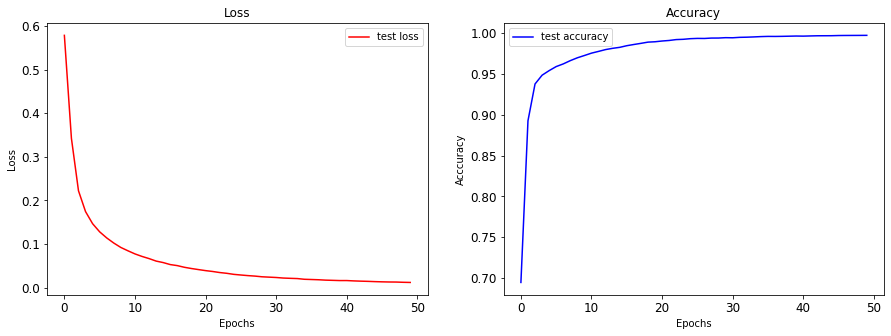

In [183]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, c='red', label='test loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.plot(epochs, acc, c='blue', label = 'test accuracy')
plt.legend(loc='best')

## Save model

In [184]:
from keras.models import load_model

In [185]:
model.save('final_model.h5') 